In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 26

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 26)                286       
                                                                 
Total params: 1,356
Trainable params: 1,356
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
373/391 [===========================>..] - ETA: 0s - loss: 2.8169 - accuracy: 0.1406
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
391/391 [==============================] - 2s 4ms/step - loss: 2.7942 - accuracy: 0.1448 - val_loss: 2.1164 - val_accuracy: 0.3172
Epoch 2/1000
374/391 [===========================>..] - ETA: 0s - loss: 2.0216 - accuracy: 0.3234
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
391/391 [==============================] - 1s 3ms/step - loss: 2.0129 - accuracy: 0.3264 - val_loss: 1.3952 - val_accuracy: 0.6663
Epoch 3/1000
371/391 [===========================>..] - ETA: 0s - loss: 1.7059 - accuracy: 0.4222
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
391/391 [==============================] - 1s 3ms/step - loss: 1.7032 - accuracy: 0.4230 - val_loss: 1.1706 - val_accuracy: 0.7606
Epoch 4/1000
383/391 [============================>.] - ETA: 0s - loss: 1.5892 - accu

Epoch 28/1000
385/391 [============================>.] - ETA: 0s - loss: 1.1559 - accuracy: 0.6147
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
391/391 [==============================] - 2s 5ms/step - loss: 1.1559 - accuracy: 0.6148 - val_loss: 0.6250 - val_accuracy: 0.8685
Epoch 29/1000
377/391 [===========================>..] - ETA: 0s - loss: 1.1535 - accuracy: 0.6152
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
391/391 [==============================] - 2s 5ms/step - loss: 1.1532 - accuracy: 0.6151 - val_loss: 0.6144 - val_accuracy: 0.8490
Epoch 30/1000
391/391 [==============================] - ETA: 0s - loss: 1.1521 - accuracy: 0.6161
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
391/391 [==============================] - 2s 5ms/step - loss: 1.1521 - accuracy: 0.6161 - val_loss: 0.6277 - val_accuracy: 0.8383
Epoch 31/1000
372/391 [===========================>..] - ETA: 0s - loss: 1.1480

Epoch 55/1000
380/391 [============================>.] - ETA: 0s - loss: 1.0671 - accuracy: 0.6527
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
391/391 [==============================] - 1s 3ms/step - loss: 1.0662 - accuracy: 0.6527 - val_loss: 0.6210 - val_accuracy: 0.8529
Epoch 56/1000
371/391 [===========================>..] - ETA: 0s - loss: 1.0580 - accuracy: 0.6577
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
391/391 [==============================] - 1s 3ms/step - loss: 1.0556 - accuracy: 0.6576 - val_loss: 0.6107 - val_accuracy: 0.8538
Epoch 57/1000
375/391 [===========================>..] - ETA: 0s - loss: 1.0669 - accuracy: 0.6568
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
391/391 [==============================] - 1s 3ms/step - loss: 1.0656 - accuracy: 0.6568 - val_loss: 0.6096 - val_accuracy: 0.8564
Epoch 58/1000
371/391 [===========================>..] - ETA: 0s - loss: 1.0604

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

131/131 [==============================] - 0s 2ms/step - loss: 0.6137 - accuracy: 0.8453


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 110ms/step
[1.0744810e-04 2.7700054e-02 6.8639900e-04 2.3115284e-04 3.4950506e-02
 6.6859000e-03 1.5817376e-04 4.5090716e-04 1.7012784e-04 1.2940336e-03
 4.4389410e-04 2.0537584e-06 5.4602540e-04 9.1968439e-05 3.4439014e-04
 1.0890923e-02 4.7556306e-03 7.2810566e-05 1.8538641e-03 3.1529620e-04
 1.2598390e-03 4.2831302e-03 9.0216887e-01 3.7979701e-04 9.4165654e-05
 6.2594590e-05]
22


# Confusion matrix

521/521 [==============================] - 1s 1ms/step


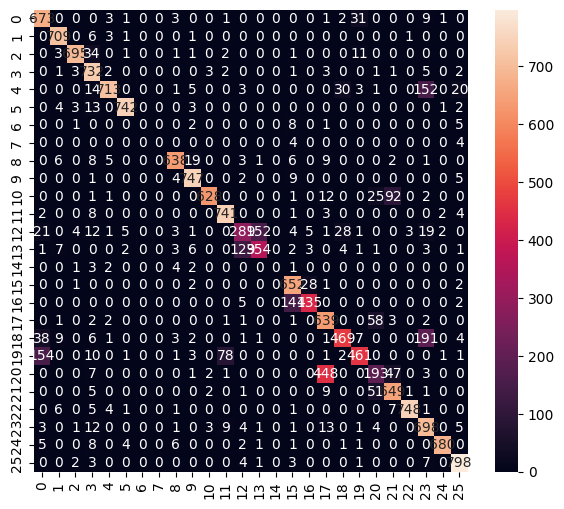

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.93      0.83       725
           1       0.95      0.98      0.97       721
           2       0.98      0.93      0.95       749
           3       0.82      0.97      0.89       756
           4       0.97      0.76      0.85       942
           5       0.98      0.97      0.97       768
           6       0.00      0.00      0.00        17
           7       0.00      0.00      0.00         8
           8       0.95      0.91      0.93       698
           9       0.94      0.97      0.96       768
          10       0.98      0.82      0.90       762
          11       0.89      0.97      0.93       761
          12       0.65      0.52      0.58       551
          13       0.69      0.68      0.69       517
          14       0.00      0.00      0.00        13
          15       0.78      0.95      0.86       686
          16       0.92      0.75      0.83       583
     

C:\Users\mohamed alameen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mohamed alameen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mohamed alameen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\MOHAME~1\AppData\Local\Temp\tmpp8howv6_\assets


INFO:tensorflow:Assets written to: C:\Users\MOHAME~1\AppData\Local\Temp\tmpp8howv6_\assets


7512

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.07448104e-04 2.77000424e-02 6.86398416e-04 2.31152866e-04
 3.49504910e-02 6.68589771e-03 1.58173774e-04 4.50907246e-04
 1.70127692e-04 1.29403442e-03 4.43894998e-04 2.05375841e-06
 5.46025403e-04 9.19684389e-05 3.44390166e-04 1.08909300e-02
 4.75563155e-03 7.28107188e-05 1.85386348e-03 3.15296114e-04
 1.25984033e-03 4.28313436e-03 9.02168989e-01 3.79796809e-04
 9.41656617e-05 6.25945977e-05]
22
